# Introduction

- Dataset

    - [Iris Dataset from Seaborn](https://github.com/mwaskom/seaborn-data/blob/master/iris.csv)

- Problem Definition 

    - The Iris flower dataset consists of measurements of four features (sepal length, sepal width, petal length, and petal width) of 150 iris flowers from three different species: Setosa, Versicolor, and Virginica. Accurate classification of iris species is essential for various botanical and ecological research purposes. Manual classification by experts can be time-consuming and prone to error. Thus, there is a need for an automated and reliable classification system that can predict the species of an iris flower based on its features. The objective of this project is to develop a user friendly web application that provides functionality to classify iris flowers into one of the three species (Setosa, Versicolor, Virginica) with high accuracy based on their sepal and petal measurements. The model will be trained and tested on the Iris dataset, leveraging various classification algorithms to identify the most effective approach.

- Following classification algorithms will be used on the dataset
    1. [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
    2. [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
    3. [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
    4. [Gaussian Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
    5. [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
    6. [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
    7. [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)
    8. [Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score


In [20]:
iris = sns.load_dataset('iris')

iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
iris.shape


(150, 5)

In [22]:
iris.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
iris = iris.drop_duplicates()
iris.shape


(149, 5)

In [24]:
iris.to_csv("Iris.csv", sep=',', index=False, encoding='utf-8')


# Data Visualization

### Box plot

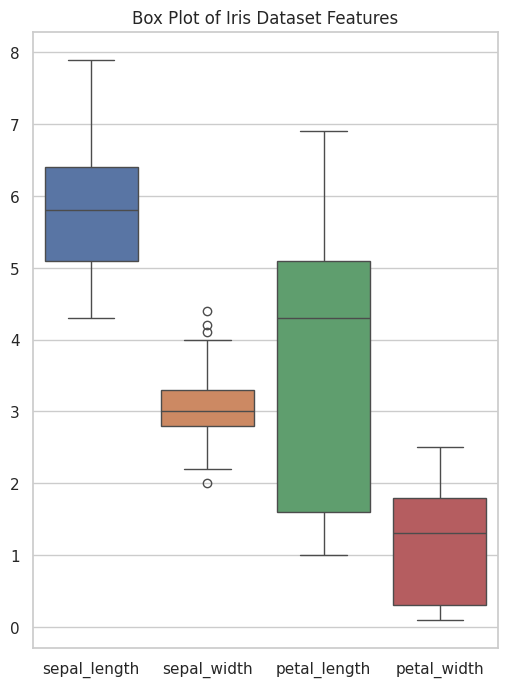

In [25]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=iris)
plt.title('Box Plot of Iris Dataset Features')
plt.show()


### Violin Plot

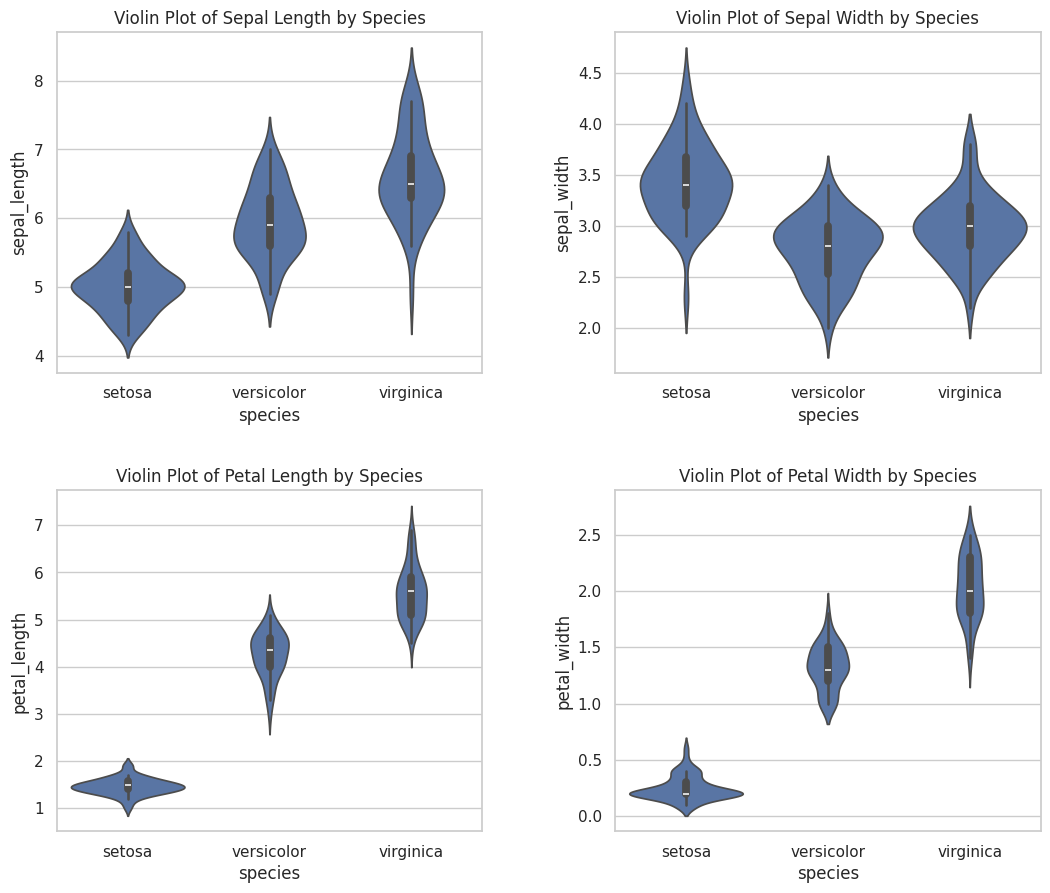

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

fig.tight_layout(pad=5.0)

sns.violinplot(ax=axes[0, 0], x='species', y='sepal_length', data=iris)
axes[0, 0].set_title('Violin Plot of Sepal Length by Species')

sns.violinplot(ax=axes[0, 1], x='species', y='sepal_width', data=iris)
axes[0, 1].set_title('Violin Plot of Sepal Width by Species')

sns.violinplot(ax=axes[1, 0], x='species', y='petal_length', data=iris)
axes[1, 0].set_title('Violin Plot of Petal Length by Species')

sns.violinplot(ax=axes[1, 1], x='species', y='petal_width', data=iris)
axes[1, 1].set_title('Violin Plot of Petal Width by Species')

plt.show()


### Scatter Plot

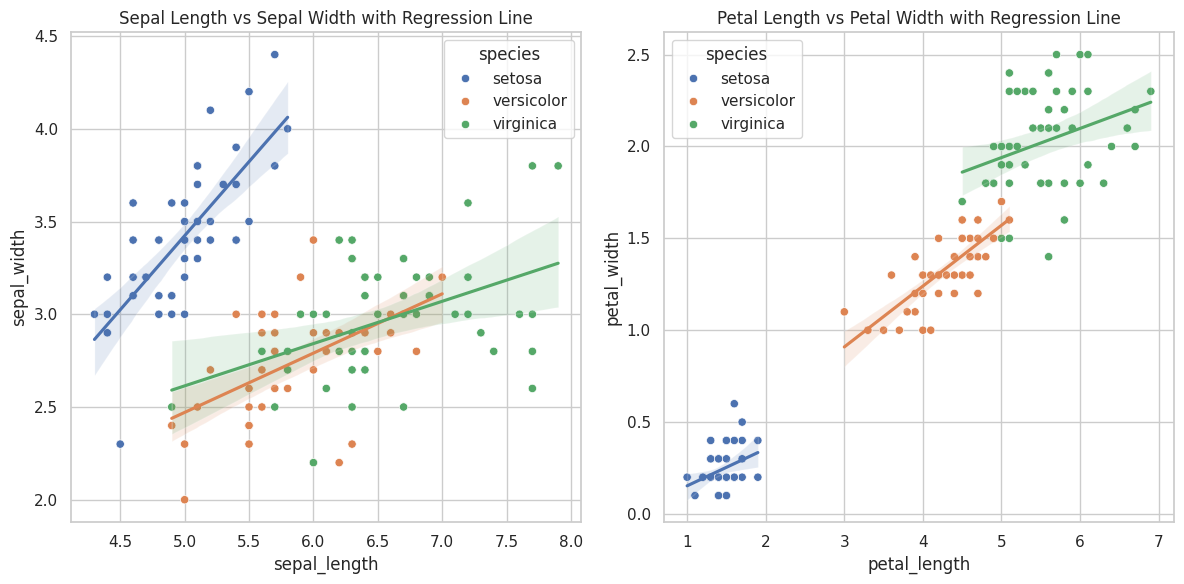

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

fig.tight_layout(pad=5.0)

sns.scatterplot(ax=axes[0], x='sepal_length', y='sepal_width', data=iris, hue='species')
for species in iris['species'].unique():
    sns.regplot(ax=axes[0], x='sepal_length', y='sepal_width',
                data=iris[iris['species'] == species],
                scatter=False, label=species)
axes[0].set_title('Sepal Length vs Sepal Width with Regression Line')

sns.scatterplot(ax=axes[1], x='petal_length', y='petal_width', data=iris, hue='species')
for species in iris['species'].unique():
    sns.regplot(ax=axes[1], x='petal_length', y='petal_width',
                data=iris[iris['species'] == species],
                scatter=False, label=species)
axes[1].set_title('Petal Length vs Petal Width with Regression Line')

plt.tight_layout()

plt.show()


### Pair Plot

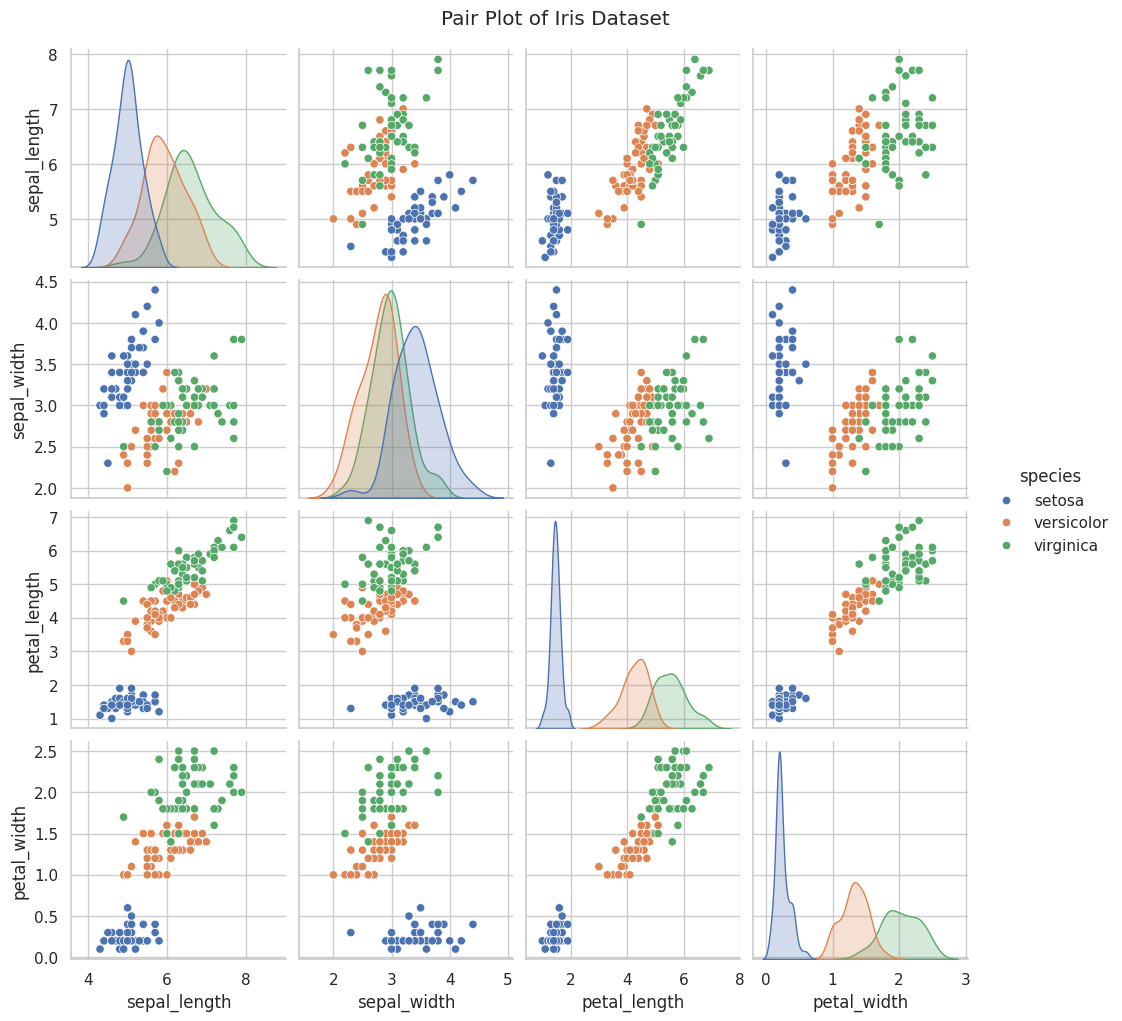

In [28]:
sns.set(style="whitegrid")

sns.pairplot(iris, hue='species')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()


### Heatmap

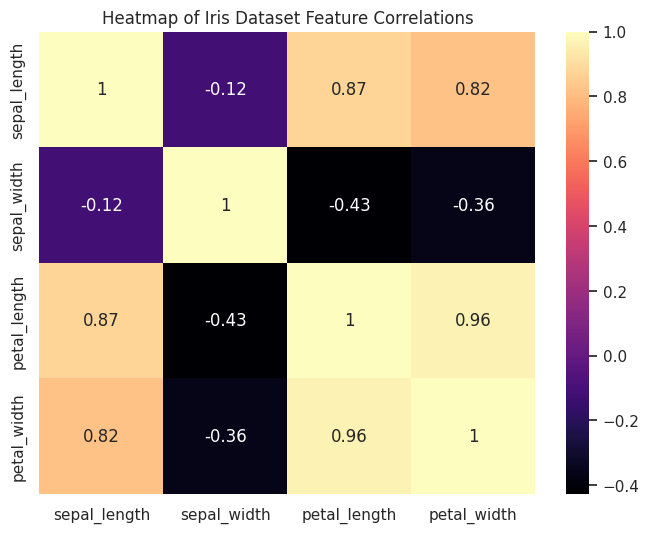

In [29]:
iris_corr = iris.iloc[:, :-1].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(iris_corr, annot=True, cmap='magma')
plt.title('Heatmap of Iris Dataset Feature Correlations')
plt.show()


# Model Training

In [30]:
# Assign features and target
feature_columns = iris.columns[:-1]
X = iris[feature_columns]

target_column = iris.columns[-1]
y = iris[target_column]


In [31]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression

In [32]:
# Build the model
logistic_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on test data
predictions = logistic_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


### Support Vector Classification

In [33]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

predictions = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("SVM Accuracy:", accuracy)


SVM Accuracy: 1.0


### K-Nearest Neighbors Classification

In [34]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

predictions = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("k-NN Accuracy:", accuracy)


k-NN Accuracy: 1.0


### Gaussian Naive Bayes Classification

In [35]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

predictions = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Naive Bayes Accuracy:", accuracy)


Naive Bayes Accuracy: 1.0


### Decision Tree Classification

In [36]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

predictions = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 1.0


### Random Forest Classification

In [37]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

predictions = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 1.0


### Gradient Boosting Classification

In [38]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

predictions = gbm_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("GBM Accuracy:", accuracy)


GBM Accuracy: 1.0


### Neural Network

In [39]:
neural_network_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000)
neural_network_model.fit(X_train, y_train)

predictions = neural_network_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Neural Network Accuracy:", accuracy)


Neural Network Accuracy: 1.0
